# About

This notebook contains various functions that allow us to perform calculations with gcd-graphs over a ring $S$, which is a quotient of the polynimal ring $\mathbb{Z}/p^n[x]$. 

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from sage.rings.finite_rings.integer_mod import IntegerMod
#R.<x> = PolynomialRing(ZZ)
from sage.rings.polynomial.cyclotomic import cyclotomic_coeffs
S1 = ZZ['x']
from collections import OrderedDict

In [3]:
def is_unit(a,S):
    for b in S:
        if a*b == 1:
            return True
    return False 
def unit_group(S):
    unit_set = set()
    unit_set = set([a for a in S if is_unit(a,S)])
    return unit_set 
def is_equiv(a,b,S):
    unit = unit_group(S)
    for d in unit:
        if a*d == b:
            return True
    return False

In [4]:
def generating_set(S, D):
    g_set = set()
    units = unit_group(S)
    for d in D:
        g_set = g_set | set([d*u for u in units])
    return g_set
def gcd_graph(S, D):
    g_set = generating_set(S, D)
    elements = [a for a in S]
    n = len(elements)
    g=nx.empty_graph(n)
    for i in range(n):
        for j in range(n):
            if (elements[i]-elements[j]) in g_set:
                g.add_edge(i,j)
    return g 

def abstract_gcd_graph(S, D):
    g_set = generating_set(S, D)
    g=nx.empty_graph(S)
    for i in S:
        for j in S:
            if (i-j) in g_set:
                g.add_edge(i,j)
    return g  
def char_poly_gcd_graph(g):
    adj_matrix = nx.adjacency_matrix(g).todense()
    matrix_size = g.number_of_nodes()
    matrix = adj_matrix
    f = MatrixSpace(IntegerRing(),matrix_size)(matrix).charpoly()
    return f.factor()
    
def orbits(S):
    units = unit_group(S)    
    def is_equivalent_sub(a,b):
        for u in units:
            if (u*a-b)==0:
                return True
        return False
    
    equiv_class = []
    for r in S:
        found = False 
        for k in equiv_class: 
            if is_equivalent_sub(r,k):
                found = True 
                break 
        if not found:
            equiv_class.append(r)
    return equiv_class

def spectral_cluster(S,D):
    units = unit_group(S)
    
    def orbits_subf():
        def is_equivalent_sub(a,b):
            for u in units:
                if (u*a-b)==0:
                    return True
            return False
            
        equiv_class = []
        for r in S:
            found = False 
            for k in equiv_class: 
                if is_equivalent_sub(r,k):
                    found = True 
                    break 
            if not found:
                equiv_class.append(r)
        return equiv_class
        
    def annihilator_subf(a):
        ann = []
        for b in S:
            if (a*b) == 0:
                ann.append(b)
        return ann
    def euler_and_mu(a):
        ann = annihilator_subf(a)
        if 2*len(ann) == len(S):
            return 1, -1
        elif len(ann) == len(S):
            return 1, 1
        else:
            return len(S)//(2*len(ann)), 0
    orbit_set = orbits_subf()
    #orbit_set = S
    N = len(orbit_set)
    d = {}
    values = {}
    for h1 in D:
        values[h1], _ = euler_and_mu(h1)
    for r in orbit_set:
        total = 0 
        for h1 in D:
            euler_2, mu_2 = euler_and_mu(h1*r)
            total +=  (values[h1]*mu_2)//euler_2 
        d[total] = d.get(total, []) + [r]
    return d 


## Test the code for the quotient ring $\mathbb{Z}/4[x]/x^2$

In [5]:
R.<x> = Integers(4)[]
S.<a> = R.quotient(x^2)

## The unit group

In [6]:
unit_group(S)

{1, 3, a + 1, a + 3, 2*a + 1, 2*a + 3, 3*a + 1, 3*a + 3}

## Generating set associated with a set of principal ideals

In [7]:
D = [1,a]
generating_set(S, D)

{1, 3, a, a + 1, a + 3, 2*a + 1, 2*a + 3, 3*a, 3*a + 1, 3*a + 3}

In [8]:
orbits(S)

[0, 1, 2, a, a + 2, 2*a]

## The gcd-graph $G_{R}(D)$ where $D=[1,a]$ 

(x - 10) * (x + 6) * (x - 2)^2 * (x + 2)^4 * x^8


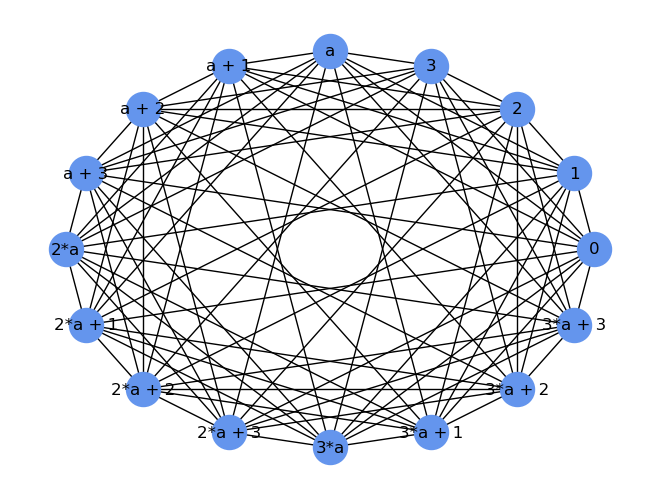

In [13]:
g = abstract_gcd_graph(S, D)
pos = nx.circular_layout(g)
nx.draw(g, pos=pos,
       with_labels = True,
       node_size = 600,
       #scale = 1,
       node_color = '#6495ED')
f = char_poly_gcd_graph(g)
print(f)

## Characteristic polynomial and spectral cluster

In [10]:
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 10) * (x + 6) * (x - 2)^2 * (x + 2)^4 * x^8


{10: [0], 0: [1], -2: [2, a + 2], 2: [a], -6: [2*a]}

## The gcd-graph $G_{R}(D)$ where $D=[1]$.

(x - 4) * (x + 4) * x^6


{4: [0], 0: [1, a], -4: [a^2]}

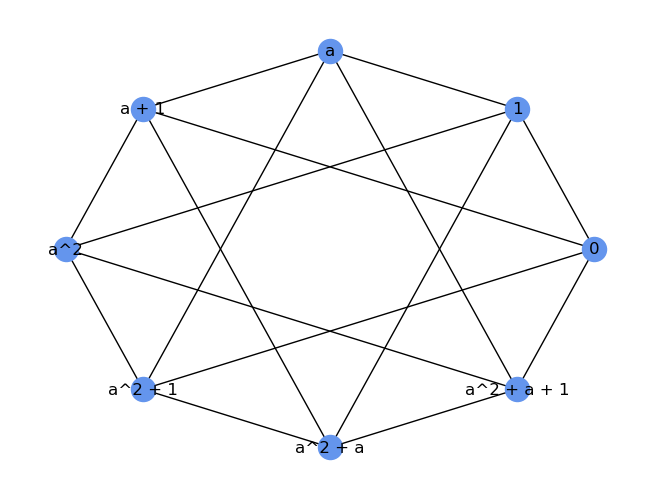

In [16]:
D=[1]
g = abstract_gcd_graph(S, D=[1])
pos = nx.circular_layout(g)
nx.draw(g, pos=pos,
       with_labels = True,
       #node_size = 600,
       #scale = 1,
       node_color = '#6495ED')
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

## The gcd-graph $G_{R}(D)$ where $R=\mathbb{Z}/2[x]/x^3$ and $D=[1,x,x^2]$

(x - 7) * (x + 1)^7


{7: [0], -1: [1, a, a^2]}

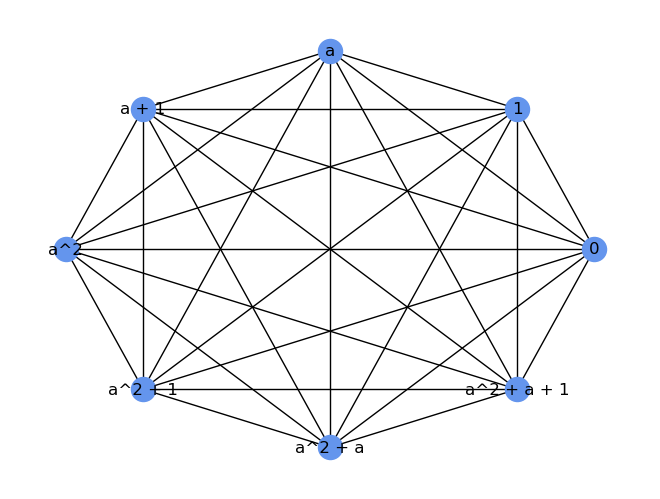

In [17]:
R.<x> = Integers(2)[]
S.<a> = R.quotient(x^3)
D=[1,x,x**2]
g = abstract_gcd_graph(S, D=[1,x,x**2])
pos = nx.circular_layout(g)
nx.draw(g, pos=pos,
       with_labels = True,
       #node_size = 600,
       #scale = 1,
       node_color = '#6495ED')
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

In [20]:
R.<x> = Integers(4)[]
S.<a> = R.quotient(x^2)
g = abstract_gcd_graph(S, D)
D= [1, a+2,2*a]
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 10) * (x + 6) * (x - 2)^2 * (x + 2)^4 * x^8


{11: [0], -1: [1, 2, a], 3: [a + 2], -5: [2*a]}

In [21]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**3)
D= [1, a+2,2*a]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 296) * (x + 216) * (x - 40)^2 * (x - 24)^4 * (x + 24)^4 * (x + 40)^4 * (x - 8)^24 * (x + 8)^24 * x^448


{296: [0],
 0: [1, 2, a, a + 2, a + 4, a + 6, a^2 + 2],
 8: [4, a^2, a^2 + 4, a^2 + 4*a, 2*a^2 + 4],
 -8: [2*a, 2*a + 4, a^2 + 2*a],
 -24: [4*a, 2*a^2],
 -40: [a^2 + 2*a + 4],
 24: [a^2 + 6*a + 4],
 40: [2*a^2 + 4*a],
 -216: [4*a^2]}

In [22]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**3)
D= [1, 4* a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 257) * (x + 255) * (x - 1)^254 * (x + 1)^256


{257: [0],
 -1: [1],
 1: [2,
  4,
  a,
  a + 2,
  a + 4,
  a + 6,
  2*a,
  2*a + 4,
  4*a,
  a^2,
  a^2 + 2,
  a^2 + 4,
  a^2 + 2*a,
  a^2 + 2*a + 4,
  a^2 + 4*a,
  a^2 + 6*a + 4,
  2*a^2,
  2*a^2 + 4,
  2*a^2 + 4*a],
 -255: [4*a^2]}

In [23]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**3)
D= [1, a, 4* a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 289) * (x + 223) * (x - 33)^6 * (x + 31)^8 * (x - 1)^240 * (x + 1)^256


{289: [0],
 -1: [1],
 1: [2,
  4,
  a,
  a + 2,
  a + 4,
  a + 6,
  2*a,
  2*a + 4,
  a^2 + 2,
  a^2 + 4,
  a^2 + 2*a,
  a^2 + 2*a + 4,
  a^2 + 6*a + 4,
  2*a^2 + 4],
 -31: [4*a, a^2 + 4*a, 2*a^2 + 4*a],
 33: [a^2, 2*a^2],
 -223: [4*a^2]}

In [24]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**3)
D= [1, 2 * a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 258) * (x + 254) * (x - 2)^126 * (x + 2)^128 * x^256


{258: [0],
 0: [1],
 -2: [2, a + 2, a + 6, a^2 + 2],
 2: [4,
  a,
  a + 4,
  2*a,
  2*a + 4,
  4*a,
  a^2,
  a^2 + 4,
  a^2 + 2*a,
  a^2 + 2*a + 4,
  a^2 + 4*a,
  a^2 + 6*a + 4,
  2*a^2,
  2*a^2 + 4,
  2*a^2 + 4*a],
 -254: [4*a^2]}

In [25]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**3)
D= [1, a, 2 * a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 290) * (x + 222) * (x - 34)^6 * (x + 30)^8 * (x - 2)^112 * (x + 2)^128 * x^256


{290: [0],
 0: [1],
 -2: [2, a + 2, a + 6, a^2 + 2],
 2: [4,
  a,
  a + 4,
  2*a,
  2*a + 4,
  a^2 + 4,
  a^2 + 2*a,
  a^2 + 2*a + 4,
  a^2 + 6*a + 4,
  2*a^2 + 4],
 -30: [4*a, a^2 + 4*a, 2*a^2 + 4*a],
 34: [a^2, 2*a^2],
 -222: [4*a^2]}

In [26]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**3)
D= [1, a, 2*a, 4*a, 2 * a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 300) * (x + 212) * (x - 44)^6 * (x + 20)^8 * (x - 12)^16 * (x + 4)^96 * x^384


{300: [0],
 0: [1, 2, a, a + 4, a^2 + 2],
 12: [4, a^2 + 4, 2*a^2 + 4],
 -4: [a + 2, a + 6, 2*a, 2*a + 4, a^2 + 2*a, a^2 + 2*a + 4, a^2 + 6*a + 4],
 -20: [4*a, a^2 + 4*a, 2*a^2 + 4*a],
 44: [a^2, 2*a^2],
 -212: [4*a^2]}

In [27]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**3)
D= [1, a, 4*a, 2 * a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 292) * (x + 220) * (x - 36)^6 * (x + 28)^8 * (x - 4)^48 * (x + 4)^64 * x^384


{292: [0],
 0: [1, 2, a, a + 4, a^2 + 2],
 4: [4,
  2*a,
  2*a + 4,
  a^2 + 4,
  a^2 + 2*a,
  a^2 + 2*a + 4,
  a^2 + 6*a + 4,
  2*a^2 + 4],
 -4: [a + 2, a + 6],
 -28: [4*a, a^2 + 4*a, 2*a^2 + 4*a],
 36: [a^2, 2*a^2],
 -220: [4*a^2]}

In [28]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**3)
D= [1, 4 * a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 257) * (x + 255) * (x - 1)^254 * (x + 1)^256


{257: [0],
 -1: [1],
 1: [2,
  4,
  a,
  a + 2,
  a + 4,
  a + 6,
  2*a,
  2*a + 4,
  4*a,
  a^2,
  a^2 + 2,
  a^2 + 4,
  a^2 + 2*a,
  a^2 + 2*a + 4,
  a^2 + 4*a,
  a^2 + 6*a + 4,
  2*a^2,
  2*a^2 + 4,
  2*a^2 + 4*a],
 -255: [4*a^2]}

In [6]:
R.<x> = Integers(4)[]
S.<a> = R.quotient(x**3)
D= [1, 2* a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 33) * (x + 31) * (x - 1)^30 * (x + 1)^32


{33: [0],
 -1: [1],
 1: [2, a, a + 2, 2*a, a^2, a^2 + 2, a^2 + 2*a],
 -31: [2*a^2]}

In [7]:
R.<x> = Integers(2)[]
S.<a> = R.quotient(x**3)
D= [1, a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 5) * (x + 3) * (x - 1)^2 * (x + 1)^4


{5: [0], -1: [1], 1: [a], -3: [a^2]}

In [13]:
R.<x> = Integers(4)[]
S.<a> = R.quotient(x**3)
D= [1, 2* a**2, a]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 41) * (x + 23) * (x - 9)^2 * (x + 7)^4 * (x - 1)^24 * (x + 1)^32


{41: [0],
 -1: [1],
 1: [2, a, a + 2, a^2 + 2],
 -7: [2*a, a^2 + 2*a],
 9: [a^2],
 -23: [2*a^2]}

In [23]:
R.<x> = Integers(2)[]
S.<a> = R.quotient(x**3)
D= [1, a,a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 7) * (x + 1)^7


{7: [0], -1: [1, a, a^2]}

In [20]:
R.<x> = Integers(4)[]
S.<a> = R.quotient(x**3)
D= [1, 2* a**2, 2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 37) * (x + 27) * (x - 5)^6 * (x + 3)^8 * (x - 1)^16 * (x + 1)^32


{37: [0],
 -1: [1],
 5: [2, 2*a],
 1: [a, a + 2],
 -3: [a^2, a^2 + 2, a^2 + 2*a],
 -27: [2*a^2]}

In [22]:
R.<x> = Integers(4)[]
S.<a> = R.quotient(x**3)
D= [1,a**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 34) * (x + 30) * (x - 2)^14 * (x + 2)^16 * x^32


{34: [0],
 0: [1],
 -2: [2, a + 2, a^2 + 2],
 2: [a, 2*a, a^2, a^2 + 2*a],
 -30: [2*a^2]}

In [24]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**2)
D= [1, 2*x, 4]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 36) * (x + 28) * (x - 4)^6 * (x + 4)^8 * x^48


{36: [0], 0: [1, 2, a, a + 4], 4: [4, 2*a, 2*a + 4], -4: [a + 2], -28: [4*a]}

In [29]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**2)
D= [1, 2*x, 4]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 36) * (x + 28) * (x - 4)^6 * (x + 4)^8 * x^48


{36: [0], 0: [1, 2, a, a + 4], 4: [4, 2*a, 2*a + 4], -4: [a + 2], -28: [4*a]}

In [30]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**2)
D= [1, 2*x]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 34) * (x + 30) * (x - 2)^14 * (x + 2)^16 * x^32


{34: [0], 0: [1], -2: [2, a + 2], 2: [4, a, a + 4, 2*a, 2*a + 4], -30: [4*a]}

In [31]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**2)
D= [1, x]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 36) * (x + 28) * (x - 4)^6 * (x + 4)^8 * x^48


{36: [0], 0: [1, 2, a + 2], -4: [4, a + 4, 2*a + 4], 4: [a, 2*a], -28: [4*a]}

In [10]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x)
D= [1, 2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 6) * (x + 2)^3 * x^4


{6: [0], 0: [1], -2: [2, 4]}

In [20]:
R.<x> = Integers(8)[]
S.<a> = R.quotient(x**2)
D= [1, 2*x**2, 4+2*x**2]
g = abstract_gcd_graph(S, D)
f = char_poly_gcd_graph(g)
print(f)
spectral_cluster(S,D)

(x - 35) * (x + 29) * (x - 3)^14 * (x + 1)^16 * (x - 1)^32


{35: [0], 1: [1], 3: [2, 4, 2*a, 2*a + 4], -1: [a, a + 2, a + 4], -29: [4*a]}